## Assignment 2b
### Implementing Feedforward neural networks with Keras and TensorFlow

### a. Import the necessary packages

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### b. Load the training and testing data (CIFAR10)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
len(x_train)

50000

In [5]:
len(x_test)

10000

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

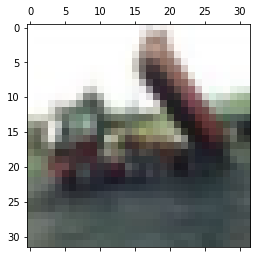

In [12]:
plt.matshow(x_train[2])

### c. Define the network architecture using Keras

In [51]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')

])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


### d. Train the model using SGD

In [52]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [53]:
history = model.fit( x_train, y_train, validation_data=(x_test,y_test) ,epochs=10 )

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8833 - accuracy: 0.3278 - val_loss: 1.8405 - val_accuracy: 0.3399
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7128 - accuracy: 0.3950 - val_loss: 1.6719 - val_accuracy: 0.4060
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6408 - accuracy: 0.4229 - val_loss: 1.6687 - val_accuracy: 0.4084
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5930 - accuracy: 0.4410 - val_loss: 1.5871 - val_accuracy: 0.4412
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5547 - accuracy: 0.4534 - val_loss: 1.5808 - val_accuracy: 0.4359
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5212 - accuracy: 0.4670 - val_loss: 1.5878 - val_accuracy: 0.4394
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4948 - accuracy: 0.4740 - val_loss: 1.5685 - val_accuracy:

### e. Evaluate the network

In [56]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print("Loss : %.3f" %test_loss)
print("Accuracy : %.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4781 - accuracy: 0.4709
Loss : 1.478
Accuracy : 0.471


In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### f. Plot the training loss and accuracy

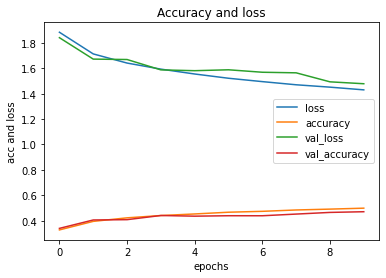

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy and loss")
plt.ylabel("acc and loss")
plt.xlabel("epochs")
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()